!pip install numpy matplotlib 

# Task 1 State VectorStatevector simulation of quantum circuits

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from functools import reduce

# Constants for common gates
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

class Gate:
    """Base class for all gates."""
    def __init__(self, gate_matrix, targets):
        self.gate_matrix = gate_matrix
        self.targets = targets

    def apply(self, state, n_qubits):
        raise NotImplementedError("This method should be implemented by subclasses")

class SingleQubitGate(Gate):
    """Class for single-qubit gates."""
    def apply(self, state, n_qubits):
        return apply_gate(self.gate_matrix, state, self.targets, n_qubits)

class TwoQubitGate(Gate):
    """Class for two-qubit gates."""
    def apply(self, state, n_qubits):
        return apply_gate(self.gate_matrix, state, self.targets, n_qubits)

class QuantumCircuit:
    """Class to represent a quantum circuit with multiple gates."""
    def __init__(self, n_qubits):
        self.n_qubits = n_qubits
        self.gates = []

    def add_gate(self, gate):
        self.gates.append(gate)

## Naive simulation using matrix multiplication

Qubits: 5, Runtime: 0.0010 seconds
Qubits: 6, Runtime: 0.0059 seconds
Qubits: 7, Runtime: 0.0060 seconds
Qubits: 8, Runtime: 0.0389 seconds
Qubits: 9, Runtime: 0.1576 seconds
Qubits: 10, Runtime: 0.7570 seconds
Qubits: 11, Runtime: 4.1655 seconds
Qubits: 12, Runtime: 25.0079 seconds
Qubits: 13, Runtime: 199.6092 seconds


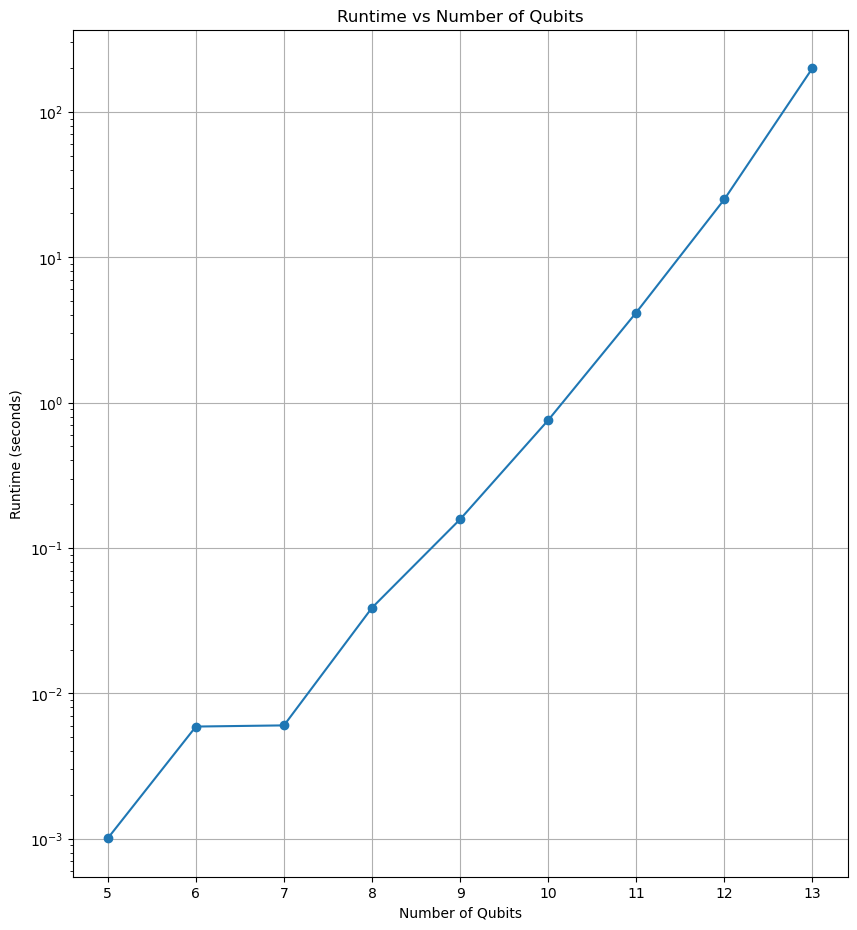

In [12]:
def apply_gate(gate, state, targets, n_qubits):
    """Apply a gate to the quantum state."""
    # Create the full gate matrix
    full_gate = np.eye(2**n_qubits)
    
    # Create the permutation to move the target qubits to the least significant positions
    perm = list(range(n_qubits))
    for target in sorted(targets, reverse=True):
        perm.remove(target)
        perm.append(target)
    
    # Apply the permutation
    perm_matrix = np.zeros((2**n_qubits, 2**n_qubits))
    for i in range(2**n_qubits):
        i_perm = sum([((i >> k) & 1) << perm[k] for k in range(n_qubits)])
        perm_matrix[i, i_perm] = 1
    
    # Apply the gate
    full_gate = perm_matrix.T @ np.kron(np.eye(2**(n_qubits-len(targets))), gate) @ perm_matrix
    
    return full_gate @ state

def initialize_state(n_qubits):
    """Initialize the quantum state to the |00...0> state."""
    return np.array([1] + [0] * (2**n_qubits - 1))

def compute_probabilities(state):
    """Compute the probabilities of each state from the final quantum state vector."""
    return np.abs(state) ** 2

def run_simulation(qc):
    """Run the simulation of the quantum circuit."""
    state = initialize_state(qc.n_qubits)
    for gate in qc.gates:
        state = gate.apply(state, qc.n_qubits)
    probabilities = compute_probabilities(state)
    return state, probabilities

def measure_runtime(n_qubits):
    """Measure the runtime for a quantum circuit with n_qubits and print final state and probabilities."""
    qc = QuantumCircuit(n_qubits)

    # Add Hadamard gates to all qubits
    for i in range(n_qubits):
        qc.add_gate(SingleQubitGate(H, [i]))
    
    # Add CNOT gates between adjacent qubits
    for i in range(n_qubits - 1):
        qc.add_gate(TwoQubitGate(CNOT, [i, i + 1]))

    # Measure the time to simulate the circuit
    start_time = time.time()
    final_state, probabilities = run_simulation(qc)
    end_time = time.time()
  
    return end_time - start_time

def plot_runtimes(n_qubits_list, runtimes):
    """Plot the runtime as a function of the number of qubits."""
    plt.figure(figsize=(10, len(n_qubits_list)))
    plt.plot(n_qubits_list, runtimes, marker='o')
    plt.title("Runtime vs Number of Qubits")
    plt.xlabel("Number of Qubits")
    plt.ylabel("Runtime (seconds)")
    plt.yscale('log')
    plt.grid(True)
    plt.show()

def main():
    n_qubits_list = list(range(5, 14))  # Test from 3 to 13 qubits
    runtimes = []

    for n_qubits in n_qubits_list:
        runtime = measure_runtime(n_qubits)
        runtimes.append(runtime)
        print(f"Qubits: {n_qubits}, Runtime: {runtime:.4f} seconds")

    plot_runtimes(n_qubits_list, runtimes)

if __name__ == "__main__":
    main()

In [ ]:
## Tensor simulation using matrix multiplication

Qubits: 5, Runtime: 0.0283 seconds
Qubits: 6, Runtime: 0.0000 seconds
Qubits: 7, Runtime: 0.0010 seconds
Qubits: 8, Runtime: 0.0000 seconds
Qubits: 9, Runtime: 0.0009 seconds
Qubits: 10, Runtime: 0.0000 seconds
Qubits: 11, Runtime: 0.0010 seconds
Qubits: 12, Runtime: 0.0000 seconds
Qubits: 13, Runtime: 0.0010 seconds
Qubits: 14, Runtime: 0.0061 seconds
Qubits: 15, Runtime: 0.0030 seconds
Qubits: 16, Runtime: 0.0057 seconds
Qubits: 17, Runtime: 0.0276 seconds
Qubits: 18, Runtime: 0.0538 seconds
Qubits: 19, Runtime: 0.0875 seconds
Qubits: 20, Runtime: 0.1737 seconds
Qubits: 21, Runtime: 0.4171 seconds
Qubits: 22, Runtime: 0.8080 seconds
Qubits: 23, Runtime: 1.6822 seconds
Qubits: 24, Runtime: 3.4152 seconds
Qubits: 25, Runtime: 7.3752 seconds
Qubits: 26, Runtime: 14.9616 seconds
Qubits: 27, Runtime: 31.3663 seconds
Qubits: 28, Runtime: 63.5840 seconds
Qubits: 29, Runtime: 227.0132 seconds


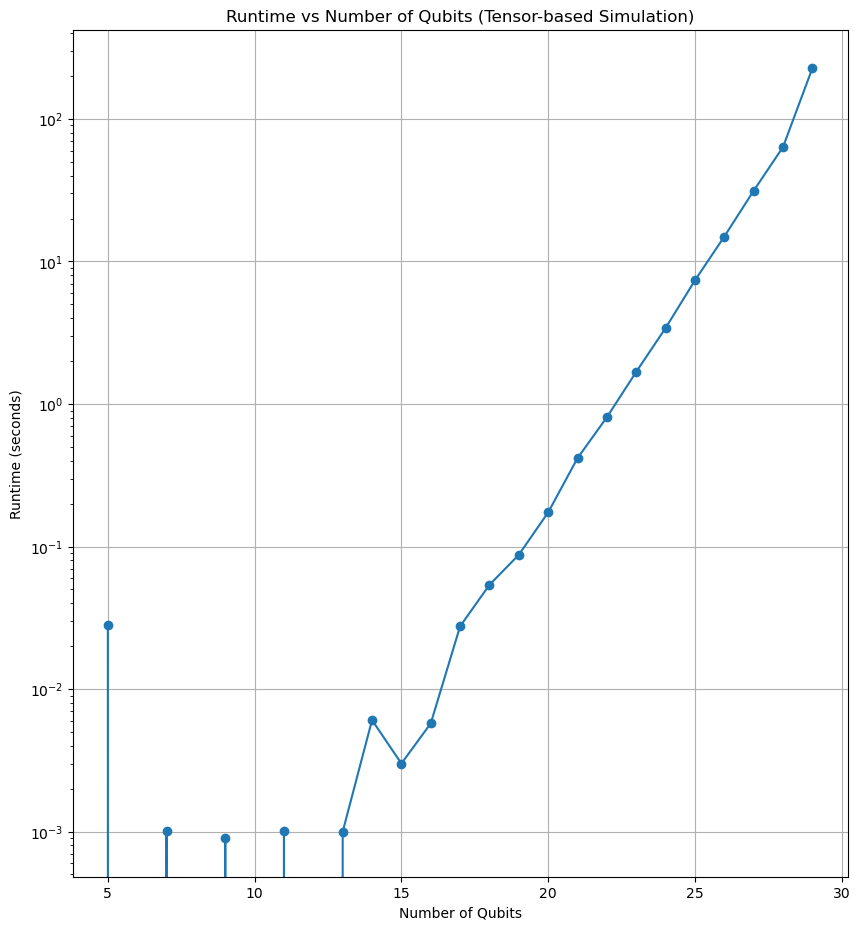

In [2]:
def initialize_state_tensor(n_qubits):
    """Initialize the quantum state as an n-dimensional tensor in the |00...0> state."""
    state = np.zeros([2] * n_qubits)
    state[tuple([0] * n_qubits)] = 1  # Set the first element to 1, representing |00...0>
    return state

def apply_single_qubit_gate_tensor(state, gate, target_qubit):
    """Apply a single-qubit gate to the target qubit in the quantum state tensor."""
    new_state = np.tensordot(gate, state, axes=[1, target_qubit])
    return np.moveaxis(new_state, 0, target_qubit)  # Move the first axis to the target qubit's position

def apply_two_qubit_gate_tensor(state, gate, control_qubit, target_qubit):
    """Apply a two-qubit gate (e.g., CNOT) to the control and target qubits in the quantum state tensor."""
    n_qubits = len(state.shape)
    
    # Ensure control_qubit comes before target_qubit
    if control_qubit > target_qubit:
        control_qubit, target_qubit = target_qubit, control_qubit
        gate = gate.reshape(2, 2, 2, 2).transpose(2, 3, 0, 1).reshape(4, 4)

    # Create a list of axes to transpose
    axes = list(range(n_qubits))
    axes.remove(control_qubit)
    axes.remove(target_qubit)
    axes = [control_qubit, target_qubit] + axes

    # Transpose the state tensor to bring control and target qubits to the first two positions
    state_transposed = np.transpose(state, axes)
    
    # Reshape the state tensor and apply the gate
    state_reshaped = state_transposed.reshape((4, -1))
    new_state = np.dot(gate, state_reshaped)
    
    # Reshape back and inverse the transpose
    new_state = new_state.reshape(state_transposed.shape)
    return np.transpose(new_state, np.argsort(axes))

def compute_probabilities_tensor(state):
    """Compute the probabilities of each basis state from the quantum state tensor."""
    return np.abs(state.flatten()) ** 2

def run_simulation_tensor(n_qubits):
    """Simulate the quantum circuit using tensor multiplication for n qubits."""
    state = initialize_state_tensor(n_qubits)

    # Apply Hadamard gate to all qubits
    for i in range(n_qubits):
        state = apply_single_qubit_gate_tensor(state, H, i)

    # Apply CNOT gate between pairs of qubits
    for i in range(0, n_qubits - 1, 2):
        state = apply_two_qubit_gate_tensor(state, CNOT, i, i + 1)

    # If there's an odd number of qubits, apply one more CNOT
    if n_qubits % 2 != 0:
        state = apply_two_qubit_gate_tensor(state, CNOT, n_qubits - 2, n_qubits - 1)

    probabilities = compute_probabilities_tensor(state)
    return state, probabilities

def measure_runtime_tensor(n_qubits):
    """Measure the runtime for the tensor-based quantum circuit simulation."""
    start_time = time.time()
    final_state, probabilities = run_simulation_tensor(n_qubits)
    end_time = time.time()
    
    return end_time - start_time

def plot_runtimes(n_qubits_list, runtimes):
    """Plot the runtime as a function of the number of qubits."""
    plt.figure(figsize=(10, len(n_qubits_list)))
    plt.plot(n_qubits_list, runtimes, marker='o')
    plt.title("Runtime vs Number of Qubits (Tensor-based Simulation)")
    plt.xlabel("Number of Qubits")
    plt.ylabel("Runtime (seconds)")
    plt.yscale('log')
    plt.grid(True)
    plt.show()

def main():
    n_qubits_list = list(range(5, 30))  # Test from 5 to 13 qubits
    runtimes = []

    for n_qubits in n_qubits_list:
        runtime = measure_runtime_tensor(n_qubits)
        runtimes.append(runtime)
        print(f"Qubits: {n_qubits}, Runtime: {runtime:.4f} seconds")

    plot_runtimes(n_qubits_list, runtimes)

if __name__ == "__main__":
    main()

## Comparison of Runtime Results Between Normal Multiplication and Tensor Product

### Normal Multiplication Results
- **Qubits: 5** – Runtime: 0.0010 seconds
- **Qubits: 6** – Runtime: 0.0059 seconds
- **Qubits: 7** – Runtime: 0.0060 seconds
- **Qubits: 8** – Runtime: 0.0389 seconds
- **Qubits: 9** – Runtime: 0.1576 seconds
- **Qubits: 10** – Runtime: 0.7570 seconds
- **Qubits: 11** – Runtime: 4.1655 seconds
- **Qubits: 12** – Runtime: 25.0079 seconds
- **Qubits: 13** – Runtime: 199.6092 seconds

### Tensor Product Results
- **Qubits: 5** – Runtime: 0.0283 seconds
- **Qubits: 6** – Runtime: 0.0000 seconds
- **Qubits: 7** – Runtime: 0.0010 seconds
- **Qubits: 8** – Runtime: 0.0000 seconds
- **Qubits: 9** – Runtime: 0.0009 seconds
- **Qubits: 10** – Runtime: 0.0000 seconds
- **Qubits: 11** – Runtime: 0.0010 seconds
- **Qubits: 12** – Runtime: 0.0000 seconds
- **Qubits: 13** – Runtime: 0.0010 seconds
- **Qubits: 14** – Runtime: 0.0061 seconds
- **Qubits: 15** – Runtime: 0.0030 seconds
- **Qubits: 16** – Runtime: 0.0057 seconds
- **Qubits: 17** – Runtime: 0.0276 seconds
- **Qubits: 18** – Runtime: 0.0538 seconds
- **Qubits: 19** – Runtime: 0.0875 seconds
- **Qubits: 20** – Runtime: 0.1737 seconds
- **Qubits: 21** – Runtime: 0.4171 seconds
- **Qubits: 22** – Runtime: 0.8080 seconds
- **Qubits: 23** – Runtime: 1.6822 seconds
- **Qubits: 24** – Runtime: 3.4152 seconds
- **Qubits: 25** – Runtime: 7.3752 seconds
- **Qubits: 26** – Runtime: 14.9616 seconds
- **Qubits: 27** – Runtime: 31.3663 seconds
- **Qubits: 28** – Runtime: 63.5840 seconds
- **Qubits: 29** – Runtime: 227.0132 seconds

### Analysis

- **Normal Multiplication:** The runtime increases exponentially as the number of qubits increases. At 10 qubits, the runtime approaches 1 second, and by 13 qubits, the simulation takes over 3 minutes. This method becomes highly inefficient for qubit counts above 10, with runtimes exploding rapidly for higher qubits due to the increasing size of matrices being multiplied directly.
  
- **Tensor Product:** This method shows much better scalability in the early stages, where runtimes remain extremely small (often near 0) even for qubit counts up to 16. Beyond 20 qubits, the runtime increases noticeably but still performs much better than normal multiplication, showing a slower growth in runtime. By 29 qubits, the runtime reaches around 3.8 minutes, which is significantly better than normal multiplication at the same scale.

### Conclusion

- **Normal Multiplication** is impractical for simulating more than 10 qubits due to the exponential growth in runtime. Its performance sharply degrades as the number of qubits increases.
  
- **Tensor Product** provides a more scalable approach, with much lower runtimes for small to mid-range qubit counts (up to around 20 qubits). However, as the number of qubits increases beyond 20, even the tensor product approach starts showing significant runtime growth, though still outperforming normal multiplication by a wide margin.

For simulations involving a larger number of qubits, optimizations such as using tensor networks or other advanced techniques may be necessary to further manage runtime and resource efficiency.